### Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


### Load & Understand the Data

In [3]:
x = [50,60,70,80,90]
y = [150,180,210,240,270]

In [4]:
#represent The area of the house
x= np.array(x)
# represent the house price in thousands
y= np.array(y)

*   X ---> Represent the area of the house
*   Y ---> Represent the house price in thousands

### Normalization

In [14]:
# get mean
def fit_data(x):
    x = np.asarray(x)
    mean = x.mean()
    std = x.std()
    return mean , std

def transform(x,mean , std):
    x = np.asarray(x)
    return (x-mean)/std

mean , std = fit_data(x)
x_scaled = transform(x , mean , std)
y_scaled = transform(y , mean , std)
print(x_scaled)
print(y_scaled)

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[ 5.65685425  7.77817459  9.89949494 12.02081528 14.14213562]


### Create and train the model

In [16]:
class LinearRegressionGD:
  def __init__(self , weight=0 , bias=0 , learning_rate = 0.001 ,n_iter = 100 , lambda_reg=0.1) :
    self.learning_rate = learning_rate
    self.n_iter = n_iter
    self.weight = weight
    self.bias = bias
    self.lambda_reg = lambda_reg
    self.sse_history = []

  def train(self , x , y):
    self.x = x
    self.y = y
    n = len(x)
    for _ in range (self.n_iter):
      y_pred = self.weight * x + self.bias

      w_der = (2/n) * np.sum((y_pred - y)* x)
      b_der = (2/n) * np.sum(y_pred - y)

      self.weight-= w_der * self.learning_rate
      self.bias -= b_der * self.learning_rate

      sse = np.sum((y - y_pred) ** 2)
      self.sse_history.append(sse)

    return self.weight , self.bias

  def predict(self, x):
    return self.weight * x + self.bias

  def plot_training(self):
    plt.figure(figsize=(10, 4))

    # SSE over iterations
    plt.subplot(1, 2, 1)
    plt.plot(self.sse_history)
    plt.xlabel("Iterations")
    plt.ylabel("SSE")
    plt.title("SSE over Iterations")

    # Regression line with data points
    plt.subplot(1, 2, 2)
    y_pred = self.predict(self.x)
    plt.scatter(self.x, self.y)
    plt.plot(self.x, y_pred)
    plt.xlabel("House Area")
    plt.ylabel("House Price)")
    plt.title("Linear Regression Fit")

    plt.tight_layout()
    plt.show()


  def lasso(self , x , y):
    self.x = x
    self.y = y
    n = len(x)
    self.weight = 0
    self.bias = 0
    self.sse_history = []

    for _ in range(self.n_iter):
        y_pred = self.weight * x + self.bias
        # Gradient for weight with L1
        w_der = (2/n) * np.sum((y_pred - y) * x)  + self.lambda_reg * np.sign(self.weight)
        b_der = (2/n) * np.sum(y_pred - y)  # bias usually not regularized

        self.weight -= self.learning_rate * w_der
        self.bias -= self.learning_rate * b_der

        sse = np.sum((y - y_pred) ** 2)  + self.lambda_reg * abs(self.weight)
        self.sse_history.append(sse)

    return self.weight, self.bias




  def ridge(self, x ,y):
      self.x = x
      self.y = y
      n = len(x)
      self.weight = 0
      self.bias = 0
      self.sse_history = []

      for _ in range(self.n_iter):
          y_pred = self.weight * x + self.bias

          # Gradient for weight with L2
          w_der = (2/n) * np.sum((y_pred - y) * x) + 2 * self.lambda_reg * self.weight
          b_der = (2/n) * np.sum(y_pred - y)  # bias usually not regularized

          self.weight -= self.learning_rate * w_der
          self.bias -= self.learning_rate * b_der

          sse = np.sum((y - y_pred) ** 2) + self.lambda_reg * (self.weight ** 2)
          self.sse_history.append(sse)

      return self.weight, self.bias
  
  def mse(self , x , y):
    y_pred = self.weight * x + self.bias
    n = len(x)
    return np.sum((y_pred - y)**2)/n




*   Theata_0 ---> Represent the weight
*   Theata_1 ---> Represent the bias

### Prediction

In [25]:
# show the weight and bias value
model = LinearRegressionGD()
weight , bias = model.train(x,y)
print ("Theta_0:" , weight)
print ("Theta_1:" , bias)

Theta_0: -7.326427288635144e+96
Theta_1: -1.0055957901462392e+95


In [24]:
#training again with lower learning rate value
model = LinearRegressionGD(learning_rate=0.00001)
weight , bias = model.train(x,y)
print ("Weigh is:" , weight)
print ("Bias is:" , bias)

Weigh is: 2.9993713328364127
Bias is: 0.04116492950170943


In [23]:
# testing after change learning rate value
model.train(x,y)
model.predict(70)


np.float64(210.00238627671123)

Is the prediction reasonable based on the dataset? Why?
---
yes, because the linear regression model learns the optimal weight and bias from the training data that help me to predict the unseen data

### Visualization

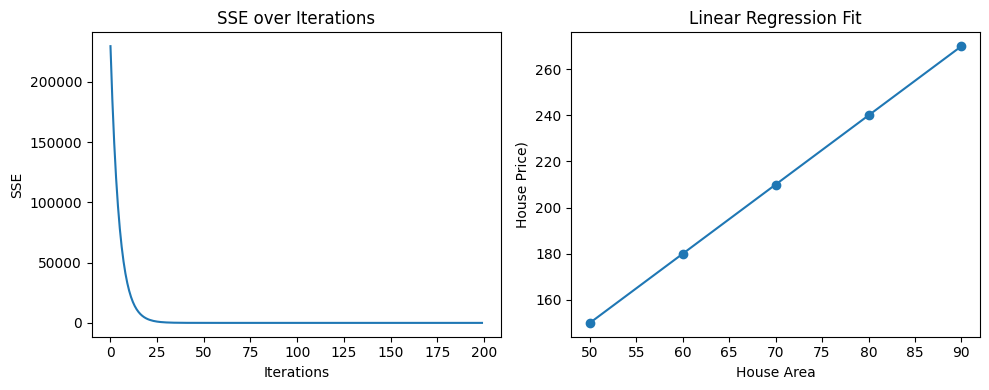

In [10]:
model.plot_training()

*    Why SSE decreases over time?    
      because Gradient Descent updates the model parameters (weight and bias) in the direction that reduces the error between the predicted values and the true values
*    What convergence means in Gradient Descent?    
      means that the algorithm has reached a point where further updates to the parameters result in very small or no improvement in the cost function

### Experimentation

In [11]:
lr_large = LinearRegressionGD(learning_rate=0.01)
lr_small = LinearRegressionGD(learning_rate=0.0000001)
l_w , l_b = lr_large.train(x, y)
s_w , s_b = lr_small.train(x, y)
print("weight in large learning rate:" , l_w)
print("Bias in large learning rate:" , l_b)
print("weight in small learning rate:" , s_w)
print("Bias in small learning rate:" , s_b)


weight in large learning rate: -8.268728662168217e+200
Bias in large learning rate: -1.1349322671141837e+199
weight in small learning rate: 0.2910496403861121
Bias in small learning rate: 0.003994797408126866


C:\Users\soker\AppData\Local\Temp\ipykernel_28360\3049578458.py:23: RuntimeWarning: overflow encountered in square
  sse = np.sum((y - y_pred) ** 2)


## What happens if the learning rate is too large?  
the model fails to reach the optimal values